In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math

## Problem 01 - Delivery_time_Model
### Delivery_time -> Predict delivery time using sorting time 

### a. Import Data

In [6]:
data_1 = pd.read_csv('delivery_time.csv')
data_1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [55]:
x = data_1['Delivery Time']
y = data_1['Sorting Time']
x_sqrt = x.transform(lambda x:x**0.5)
y_sqrt = y.transform(lambda x:x**0.5)
x_log = np.log2(data_1['Delivery Time'])
y_log = np.log2(data_1['Sorting Time'])

### b. Data Understading

In [10]:
data_1.shape, data_1.isnull().sum() , data_1.dtypes

((21, 2),
 Delivery Time    0
 Sorting Time     0
 dtype: int64,
 Delivery Time    float64
 Sorting Time       int64
 dtype: object)

In [19]:
# Normality Check for input data
stat, p = stats.shapiro(data_1['Sorting Time'])
if p>0.05:
    print('p value =', p,'thus data is normally distributed')
else:
    print('p value =', p,'thus data is not normally distributed')

p value = 0.1881045252084732 thus data is normally distributed


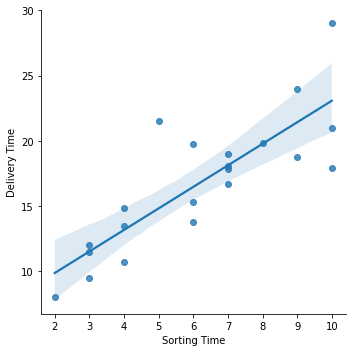

In [20]:
# linearity test
sns.lmplot(x = 'Sorting Time', y = 'Delivery Time', data = data_1)

In [60]:
# multicollinearity and Auto regression test can not be performed as single independent input given.

In [67]:
corr_1 = np.corrcoef(x, y)
corr_2 = np.corrcoef(x_sqrt, y)
corr_3 = np.corrcoef(x, y_sqrt)
corr_4 = np.corrcoef(x_sqrt, y_sqrt)
corr_5 = np.corrcoef(x_log, y)
corr_6 = np.corrcoef(x, y_log)
corr_7 = np.corrcoef(x_log, y_log)
print('Corr_1 =', corr_1)
print('Corr_2 =', corr_2)
print('Corr_3 =', corr_3)
print('Corr_4 =', corr_4)
print('Corr_5 =', corr_5)
print('Corr_6 =', corr_6)
print('Corr_7 =', corr_7)

Corr_1 = [[1.         0.82599726]
 [0.82599726 1.        ]]
Corr_2 = [[1.        0.8390768]
 [0.8390768 1.       ]]
Corr_3 = [[1.      0.83415]
 [0.83415 1.     ]]
Corr_4 = [[1.         0.85393278]
 [0.85393278 1.        ]]
Corr_5 = [[1.         0.84317726]
 [0.84317726 1.        ]]
Corr_6 = [[1.         0.83393253]
 [0.83393253 1.        ]]
Corr_7 = [[1.         0.87872712]
 [0.87872712 1.        ]]


In [68]:
# from above correlation results we can observe that log transformation of both independent and dependent variable gives the highest correlation.

## c. data preparation
## d. Model Building and Model Trianing

In [85]:
# Model 1 - NO transformation of both x and y
linear_model_1 = sm.OLS(x, y).fit()
prediction_1 = linear_model_1.predict(y)
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    6.12e-15
Time:                        13:10:33   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Model 2 -sqrt transformation of x
linear_model_2 = sm.OLS(x_sqrt, y).fit()
prediction_2 = linear_model_7.predict(y)
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    5.09e-13
Time:                        12:57:35   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Model 3 -sqrt transformation of y
linear_model_3 = sm.OLS(x, y_sqrt).fit()
prediction_3 = linear_model_7.predict(y_sqrt)
linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    1.88e-17
Time:                        12:57:37   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Model 4 -sqrt transformation of both x and y
linear_model_4 = sm.OLS(x_sqrt, y_sqrt).fit()
prediction_4 = linear_model_4.predict(y_sqrt)
linear_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    2.10e-20
Time:                        12:57:39   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Model 5 -Log transformation of x
linear_model_5 = sm.OLS(x_log, y).fit()
prediction_5 = linear_model_5.predict(y)
linear_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    3.00e-12
Time:                        12:57:42   Log-Likelihood:                         -32.981
No. Observations:                  21   AIC:                                      67.96
Df Residuals:                      20   BIC:                                      69.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.5783      0.039     14.821      0.000       0.497       0.660
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Model 6 -Log transformation of y
linear_model_6 = sm.OLS(x, y_log).fit()
prediction_6 = linear_model_6.predict(y_log)
linear_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    1.48e-17
Time:                        12:57:43   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.7031      0.238     28.124      0.000       6.206       7.200
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Model 7 -Log transformation of both x and y
linear_model_7 = sm.OLS(x_log, y_log).fit()
prediction_7 = linear_model_7.predict(y_log)
linear_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    5.72e-17
Time:                        12:50:18   Log-Likelihood:                         -21.596
No. Observations:                  21   AIC:                                      45.19
Df Residuals:                      20   BIC:                                      46.24
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## e. Model Selection
 From above output for all model summary we can observe linear model 4 with sqrt transformation of both x and y gives highest R squared value which indicate 
**Linear Model 4 with sqrt transformation of both x and y**

## Problem 02 - Salary_hike_Model
### Build a prediction model for Salary_hike 
### a. Importin Data

In [86]:
data_2 = pd.read_csv('Salary_Data.csv')
data_2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### b. Data Understanding

In [88]:
data_2.shape, data_2.isnull().sum() , data_2.dtypes

((30, 2),
 YearsExperience    0
 Salary             0
 dtype: int64,
 YearsExperience    float64
 Salary             float64
 dtype: object)

In [89]:
# Normality Check for input data
stat, p = stats.shapiro(data_2['YearsExperience'])
if p>0.05:
    print('p value =', p,'thus data is normally distributed')
else:
    print('p value =', p,'thus data is not normally distributed')

p value = 0.10337740182876587 thus data is normally distributed


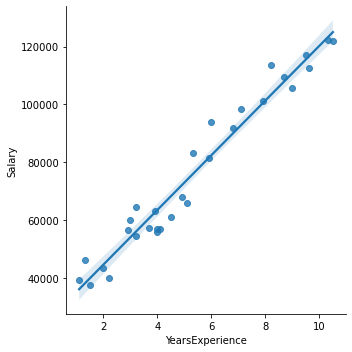

In [90]:
# linearity test
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = data_2)

In [99]:
x = data_2['Salary']
y = data_2['YearsExperience']
x_sqrt = x.transform(lambda x:x**0.5)
y_sqrt = y.transform(lambda x:x**0.5)
x_log = np.log2(x)
y_log = np.log2(y)

In [100]:
corr_1 = np.corrcoef(x, y)
corr_2 = np.corrcoef(x_sqrt, y)
corr_3 = np.corrcoef(x, y_sqrt)
corr_4 = np.corrcoef(x_sqrt, y_sqrt)
corr_5 = np.corrcoef(x_log, y)
corr_6 = np.corrcoef(x, y_log)
corr_7 = np.corrcoef(x_log, y_log)
print('Corr_1 =', corr_1)
print('Corr_2 =', corr_2)
print('Corr_3 =', corr_3)
print('Corr_4 =', corr_4)
print('Corr_5 =', corr_5)
print('Corr_6 =', corr_6)
print('Corr_7 =', corr_7)

Corr_1 = [[1.         0.97824162]
 [0.97824162 1.        ]]
Corr_2 = [[1.         0.97459497]
 [0.97459497 1.        ]]
Corr_3 = [[1.         0.96488391]
 [0.96488391 1.        ]]
Corr_4 = [[1.         0.97054058]
 [0.97054058 1.        ]]
Corr_5 = [[1.         0.96538444]
 [0.96538444 1.        ]]
Corr_6 = [[1.         0.92406108]
 [0.92406108 1.        ]]
Corr_7 = [[1.         0.95142791]
 [0.95142791 1.        ]]


In [101]:
# from above correlation results we can observe that log transformation of both independent and dependent variable gives the highest correlation.

## c. data preparation
## d. Model Building and Model Trianing

In [103]:
# Model 1 - NO transformation of both x and y
linear_model_1 = sm.OLS(x, y).fit()
prediction_1 = linear_model_1.predict(y)
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    2.56e-24
Time:                        15:19:32   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Model 2 -sqrt transformation of x
linear_model_2 = sm.OLS(x_sqrt, y).fit()
prediction_2 = linear_model_7.predict(y)
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    2.12e-16
Time:                        15:19:32   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Model 3 -sqrt transformation of y
linear_model_3 = sm.OLS(x, y_sqrt).fit()
prediction_3 = linear_model_7.predict(y_sqrt)
linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    3.62e-30
Time:                        15:19:33   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# Model 4 -sqrt transformation of both x and y
linear_model_4 = sm.OLS(x_sqrt, y_sqrt).fit()
prediction_4 = linear_model_4.predict(y_sqrt)
linear_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    2.81e-29
Time:                        15:19:34   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# Model 5 -Log transformation of x
linear_model_5 = sm.OLS(x_log, y).fit()
prediction_5 = linear_model_5.predict(y)
linear_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    6.09e-12
Time:                        15:19:34   Log-Likelihood:                         -101.16
No. Observations:                  30   AIC:                                      204.3
Df Residuals:                      29   BIC:                                      205.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     2.4173      0.218     11.083      0.000       1.971       2.863
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Model 6 -Log transformation of y
linear_model_6 = sm.OLS(x, y_log).fit()
prediction_6 = linear_model_6.predict(y_log)
linear_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    8.06e-26
Time:                        15:19:35   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  3.402e+04    930.062     36.583      0.000    3.21e+04    3.59e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# Model 7 -Log transformation of both x and y
linear_model_7 = sm.OLS(x_log, y_log).fit()
prediction_7 = linear_model_7.predict(y_log)
linear_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                    8.60e-15
Time:                        15:19:36   Log-Likelihood:                         -94.405
No. Observations:                  30   AIC:                                      190.8
Df Residuals:                      29   BIC:                                      192.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## e. Model Selection
 From above output for all model summary we can observe linear model 3 with sqrt transformation of both y gives highest R squared value which indicate comparatively better model amongst the all model considered
**Linear Model 4 with sqrt transformation of both x and y**